<a href="https://colab.research.google.com/github/sira-code/my_beautiful_repo/blob/master/PREDICT_THE_QUALITY_OF_WINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy.stats
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [30]:
red = pd.read_csv('red_wine_quality.csv')
white = pd.read_csv('white_wine_quality.csv')

In [31]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [32]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [33]:
def call(functionToCall):
    print('\nRed Wine\n')
    functionToCall(red)
    print('\nWhite Wine\n')
    functionToCall(white)

In [34]:
def rm(wine_set):
    wine_set.columns = [x.strip().replace(' ','_') for x in wine_set.columns]
call(rm)


Red Wine


White Wine



In [35]:
red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [36]:
white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6



Red Wine



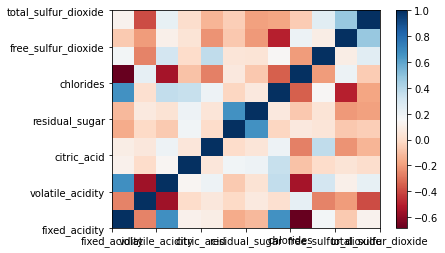


White Wine



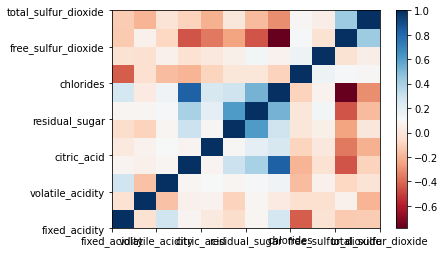

In [37]:
# COVARIENCE MATRIX

def covmax(wine_set):
    cov_mat = wine_set.corr(method = 'pearson')
    fig = plt.figure().add_subplot(111)
    plt.pcolor(cov_mat, cmap = 'RdBu')
    plt.colorbar()
    fig.set_xticklabels(wine_set.columns)
    fig.set_yticklabels(wine_set.columns)
    plt.show()
call(covmax)

In [38]:
def add_categ_quality(wine_set):
    low = wine_set[wine_set['quality'] <= 5]
    medium = wine_set[(wine_set['quality'] == 6) | (wine_set['quality'] == 7)]
    high = wine_set[wine_set['quality'] > 7]
    
    low['quality_mark'] = 'low'
    medium['quality_mark'] = 'medium'
    high['quality_mark'] = 'high'
    
    frames = [low, medium, high]
    return pd.concat(frames)

In [39]:
def anova(wine_set):
    prepared_data = add_categ_quality(wine_set)
    model1 = smf.ols(formula='total_sulfur_dioxide ~ C(quality_mark)', data = prepared_data)
    results1 = model1.fit()
    print(results1.summary())
    
    sub = prepared_data[['total_sulfur_dioxide', 'quality_mark']]
    print("\nMeans for total sulfur dioxide by quality marks of wine \n")
    print(sub.groupby('quality_mark').mean())
    print('\nStandard deviation for total sulfur dioxide by quality marks of wine \n')
    print(sub.groupby('quality_mark').std(), '\n')
    
    # Perform Post hoc test
    mc1 = multi.MultiComparison(sub['total_sulfur_dioxide'], sub['quality_mark'])
    res1 = mc1.tukeyhsd()
    print(res1.summary())
    
call(anova)


Red Wine

                             OLS Regression Results                             
Dep. Variable:     total_sulfur_dioxide   R-squared:                       0.054
Model:                              OLS   Adj. R-squared:                  0.053
Method:                   Least Squares   F-statistic:                     45.71
Date:                  Wed, 08 Jul 2020   Prob (F-statistic):           4.97e-20
Time:                          06:43:22   Log-Likelihood:                -7809.7
No. Observations:                  1599   AIC:                         1.563e+04
Df Residuals:                      1596   BIC:                         1.564e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------


Red Wine



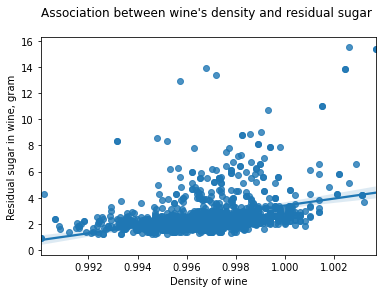


White Wine



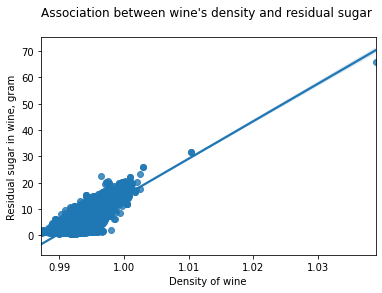

In [40]:
def pearson(wine_set):
    scat1 = seaborn.regplot(x = "density", y = "residual_sugar", fit_reg = True, data = wine_set)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar \n")
    plt.show()

call(pearson)


Red Wine



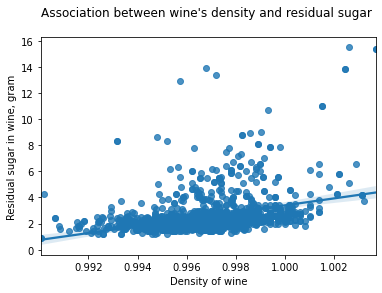

(0.35528337098337653, 9.013041728300921e-49)

White Wine



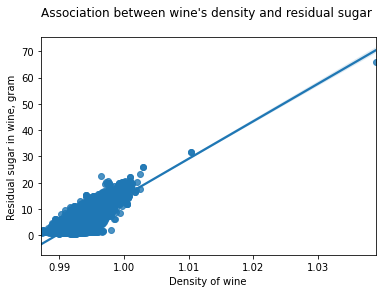

(0.8389664549045833, 0.0)


In [41]:
def pearson(wine_set):
    scat1 = seaborn.regplot(x = "density", y = "residual_sugar", fit_reg = True, data = wine_set)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar \n")
    plt.show()
    print(scipy.stats.pearsonr(wine_set['density'], wine_set["residual_sugar"]))

call(pearson)


Red Wine

association between wine`s density and residual sugar for wines 
of `low` quality
(0.40512747741473687, 9.329990304725039e-31)

of `medium` quality
(0.3301725171944208, 9.754348168744061e-23)

of `high` quality
(0.5797231322874935, 0.011679205341894067)


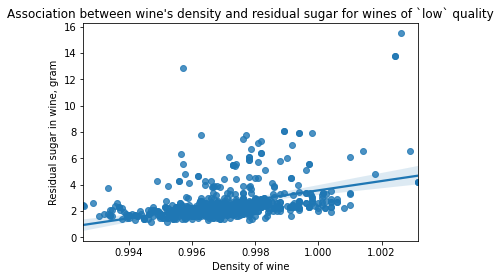

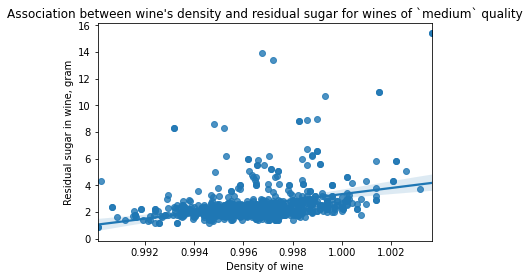

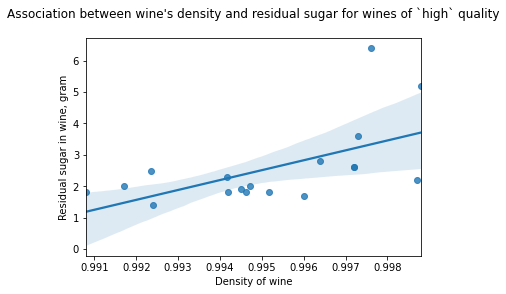


White Wine

association between wine`s density and residual sugar for wines 
of `low` quality
(0.8796644895829153, 0.0)

of `medium` quality
(0.8458419941200985, 0.0)

of `high` quality
(0.821087020810555, 3.274380626882595e-45)


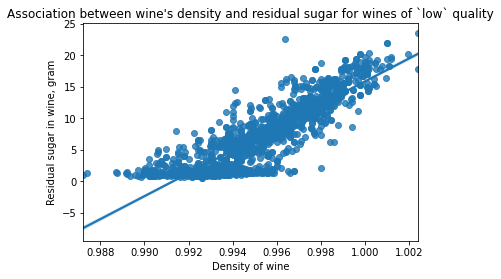

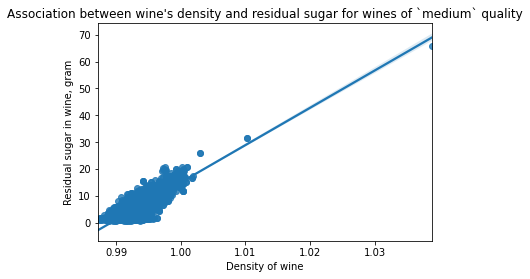

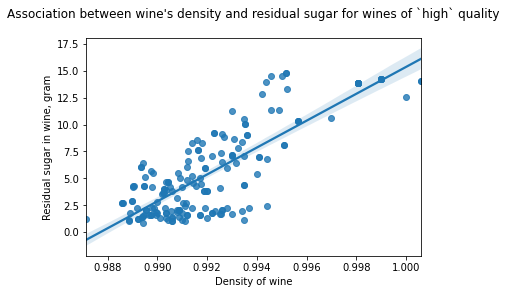

In [42]:
def explore(wine_set):
    low = wine_set[wine_set['quality'] <= 5]
    medium = wine_set[(wine_set['quality'] == 6) | (wine_set['quality'] == 7)]
    high = wine_set[wine_set['quality'] > 7]

    print('association between wine`s density and residual sugar for wines \nof `low` quality')
    print(scipy.stats.pearsonr(low['density'], low["residual_sugar"]))
    print('\nof `medium` quality')
    print(scipy.stats.pearsonr(medium['density'], medium["residual_sugar"]))
    print('\nof `high` quality')
    print(scipy.stats.pearsonr(high['density'], high["residual_sugar"]))

    scat0 = seaborn.regplot(x="density", y="residual_sugar", fit_reg=True, data=low)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar for wines of `low` quality")
    plt.show()

    scat0 = seaborn.regplot(x="density", y="residual_sugar", fit_reg=True, data=medium)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar for wines of `medium` quality")
    plt.show()

    scat0 = seaborn.regplot(x="density", y="residual_sugar", fit_reg=True, data=high)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar for wines of `high` quality\n")
    plt.show()

call(explore)

In [43]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [44]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [47]:
def basicInfo(wine_set):
    print(len(wine_set))
    print(len(wine_set.columns))
    print(list(wine_set.columns.values))
    #print(wine_set.ix[:10,:4])
    print('\n')
    print("--------------describe the data-----------------")
    print('\n')
    print(wine_set.describe())

call(basicInfo)


Red Wine

1599
12
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


--------------describe the data-----------------


       fixed_acidity  volatile_acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

White Wine

4898
12
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 

In [48]:
def frequencyDists(wine_set):
    print("This is the frequency distribution of the wines' quality.")
    print(wine_set.groupby("quality").size()*100 / len(wine_set))
    print()

call(frequencyDists)


Red Wine

This is the frequency distribution of the wines' quality.
quality
3     0.625391
4     3.314572
5    42.589118
6    39.899937
7    12.445278
8     1.125704
dtype: float64


White Wine

This is the frequency distribution of the wines' quality.
quality
3     0.408330
4     3.327889
5    29.746835
6    44.875459
7    17.966517
8     3.572887
9     0.102082
dtype: float64



In [49]:
def quartileSplit(wine_set):
    print("QUARILE SPLIT: wines' quality.")
    print("I-st -column contains the intervals of wines' quality;")
    print("II-nd - the number of wine samples with the quality in the corresponding interval.")
    wine_set["quality_quart"] = pd.qcut(wine_set["quality"], 3)
    print(wine_set.groupby("quality_quart").size())

call(quartileSplit)


Red Wine

QUARILE SPLIT: wines' quality.
I-st -column contains the intervals of wines' quality;
II-nd - the number of wine samples with the quality in the corresponding interval.
quality_quart
(2.999, 5.0]    744
(5.0, 6.0]      638
(6.0, 8.0]      217
dtype: int64

White Wine

QUARILE SPLIT: wines' quality.
I-st -column contains the intervals of wines' quality;
II-nd - the number of wine samples with the quality in the corresponding interval.
quality_quart
(2.999, 5.0]    1640
(5.0, 6.0]      2198
(6.0, 9.0]      1060
dtype: int64



Red Wine



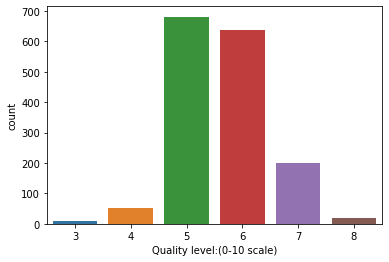


White Wine



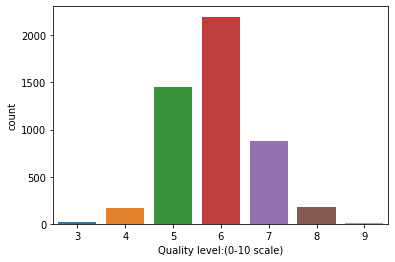

In [50]:
def countplots(wine_set):
    wine_set["quality"] = pd.Categorical(wine_set["quality"])
    seaborn.countplot(x="quality", data=wine_set)
    plt.xlabel("Quality level:(0-10 scale)")
    plt.show()

call(countplots)


Red Wine



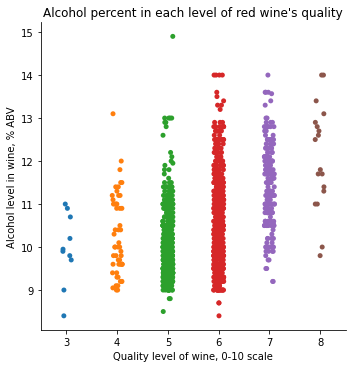


White Wine



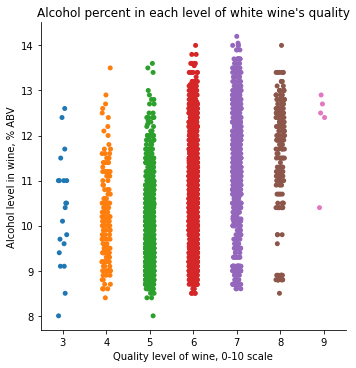

In [51]:
def factorplots(wine_set):
    seaborn.factorplot(x="quality", y="alcohol", data=wine_set, kind="strip")
    plt.xlabel("Quality level of wine, 0-10 scale")
    plt.ylabel("Alcohol level in wine, % ABV")
    if wine_set.equals(red):
        plt.title("Alcohol percent in each level of red wine's quality")
    else:
        plt.title("Alcohol percent in each level of white wine's quality")
    plt.show()

call(factorplots)

In [52]:
#MODEL BUILDING

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import time
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import matplotlib.pyplot as plt
import operator
from sklearn import preprocessing
from sklearn.linear_model import LassoLarsCV
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [55]:
#LOGISTIC REGRESSION

In [61]:
def log_regression(wine_set):
    # local variable to identify if the wine_set red or white
    w = wine_set


    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)


    # split into training and testing sets
    predictors = wine_set[["sulphates", 'alcohol']]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

    # build model on training data
    classifier = LogisticRegression()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)

     # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print ('Score:', classifier.score(pred_test, tar_test))
    print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)

print('/////////////////Logistic Regression\\\\\\\\\\\\\\\\\\')
call(log_regression)

/////////////////Logistic Regression\\\\\\\\\

Red Wine

Confusion Matrix:
 [[221  95]
 [ 82 242]]
Accuracy: 0.7234375
Score: 0.7234375
RMSE: 0.5258920991990658

White Wine

Confusion Matrix:
 [[ 289  385]
 [ 230 1056]]
Accuracy: 0.6862244897959183
Score: 0.6862244897959183
RMSE: 0.5601566836199329


In [66]:
#DECISION TREE

In [65]:
def decision_tree(wine_set):
    # local variable to identify if the wine_set red or white
    w = wine_set


    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)


    # split into training and testing sets
    predictors = wine_set[["residual_sugar", 'alcohol']]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

    # build model on training data
    classifier = DecisionTreeClassifier()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)

     # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print ('Score:', classifier.score(pred_test, tar_test))
    print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)

print('-------Decision Tree-------')
call(decision_tree)

-------Decision Tree-------

Red Wine

Confusion Matrix:
 [[198  92]
 [130 220]]
Accuracy: 0.653125
Score: 0.653125
RMSE: 0.5889609494694873

White Wine

Confusion Matrix:
 [[ 399  284]
 [ 260 1017]]
Accuracy: 0.7224489795918367
Score: 0.7224489795918367
RMSE: 0.5268311118453078


In [67]:
#K-NEAREST NEIGHBOURS(KNN)

In [68]:
def knn(wine_set):
    
    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)

    # split into training and testing sets
    predictors = wine_set[["residual_sugar", 'alcohol']]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)
    
    
    # build model on training data
    classifier = KNeighborsClassifier()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)

    # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print ('Score:', classifier.score(pred_test, tar_test))
    print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)

    
print('----------------KNN------------------------')
call(knn)

----------------KNN------------------------

Red Wine

Confusion Matrix:
 [[195 101]
 [100 244]]
Accuracy: 0.6859375
Score: 0.6859375
RMSE: 0.5604127942864974

White Wine

Confusion Matrix:
 [[ 319  339]
 [ 232 1070]]
Accuracy: 0.7086734693877551
Score: 0.7086734693877551
RMSE: 0.5397467282089303


In [69]:
#NAIVE BAYES

In [70]:
def naive(wine_set):
   
    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)

    # split into training and testing sets
    predictors = wine_set[["density", 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 'fixed_acidity',
                           'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)
    

    classifier = GaussianNB()
    classifier.fit(pred_train, tar_train)
    predictionsG = classifier.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictionsG))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictionsG))
    print("Gaus:" + str(classifier.score(pred_test, tar_test)))
    mse = mean_squared_error(predictionsG, tar_test)
    print('MSE:',mse ** 0.5)

    classifierm = MultinomialNB()
    classifierm.fit(pred_train, tar_train)
    predictionsM = classifierm.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('\nConfusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictionsM))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictionsM))
    print("Multi:" + str(classifierm.score(pred_test, tar_test)))
    mse = mean_squared_error(predictionsM, tar_test)
    print('MSE:',mse ** 0.5)

    classifierb = BernoulliNB()
    classifierb.fit(pred_train, tar_train)
    predictionsB = classifierb.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('\nConfusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictionsB))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictionsB))
    print("Bernoulli:" + str(classifierb.score(pred_test, tar_test)))
    mse = mean_squared_error(predictionsB, tar_test)
    print('MSE:',mse ** 0.5)
    

print('----------------Naive Bayes------------------------')
call(naive)

----------------Naive Bayes------------------------

Red Wine

Confusion Matrix:
 [[220  67]
 [110 243]]
Accuracy: 0.7234375
Gaus:0.7234375
MSE: 0.5258920991990658

Confusion Matrix:
 [[142 145]
 [ 96 257]]
Accuracy: 0.6234375
Multi:0.6234375
MSE: 0.6136468854316789

Confusion Matrix:
 [[ 27 260]
 [ 30 323]]
Accuracy: 0.546875
Bernoulli:0.546875
MSE: 0.673145600891813

White Wine

Confusion Matrix:
 [[ 345  307]
 [ 293 1015]]
Accuracy: 0.6938775510204082
Gaus:0.6938775510204082
MSE: 0.5532833351724882

Confusion Matrix:
 [[ 280  372]
 [ 297 1011]]
Accuracy: 0.6586734693877551
Multi:0.6586734693877551
MSE: 0.5842315727622437

Confusion Matrix:
 [[   5  647]
 [   3 1305]]
Accuracy: 0.6683673469387755
Bernoulli:0.6683673469387755
MSE: 0.5758755534498964


In [ ]:
#RANDOM FOREST

----------------Random Forests------------------------

Red Wine

Confusion matrix:
 [[221  67]
 [ 72 280]]
Accuracy: 0.7828125

Importance of predictors:
[('alcohol', 0.1959103652398871), ('sulphates', 0.1102747296070563), ('total_sulfur_dioxide', 0.10516231759315205), ('volatile_acidity', 0.09666305677310887), ('density', 0.08272435527072607), ('citric_acid', 0.07476784708744066), ('fixed_acidity', 0.07087721570448371), ('chlorides', 0.06884441942321917), ('free_sulfur_dioxide', 0.0654641670475239), ('pH', 0.06533411028936956), ('residual_sugar', 0.06397741596403266)]


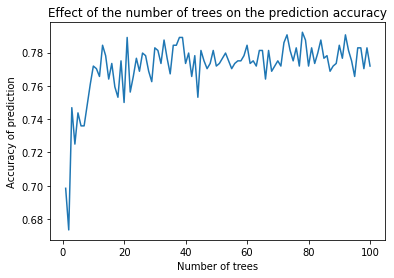

[0.6984375, 0.6734375, 0.746875, 0.725, 0.74375, 0.7359375, 0.7359375, 0.7484375, 0.7609375, 0.771875, 0.7703125, 0.765625, 0.784375, 0.778125, 0.7640625, 0.7734375, 0.759375, 0.753125, 0.775, 0.75, 0.7890625, 0.75625, 0.765625, 0.7765625, 0.76875, 0.7796875, 0.778125, 0.76875, 0.7625, 0.7828125, 0.78125, 0.7734375, 0.7875, 0.7765625, 0.7671875, 0.784375, 0.784375, 0.7890625, 0.7890625, 0.7734375, 0.7796875, 0.765625, 0.778125, 0.753125, 0.78125, 0.775, 0.7703125, 0.7734375, 0.78125, 0.771875, 0.7734375, 0.7765625, 0.7796875, 0.775, 0.7703125, 0.7734375, 0.775, 0.775, 0.778125, 0.784375, 0.7734375, 0.775, 0.771875, 0.78125, 0.78125, 0.7640625, 0.78125, 0.76875, 0.771875, 0.775, 0.771875, 0.7859375, 0.790625, 0.78125, 0.775, 0.7828125, 0.771875, 0.7921875, 0.7875, 0.771875, 0.7828125, 0.7734375, 0.7796875, 0.7875, 0.7765625, 0.778125, 0.76875, 0.771875, 0.7734375, 0.784375, 0.7765625, 0.790625, 0.78125, 0.775, 0.765625, 0.7828125, 0.7828125, 0.7703125, 0.7828125, 0.771875]

White Wine



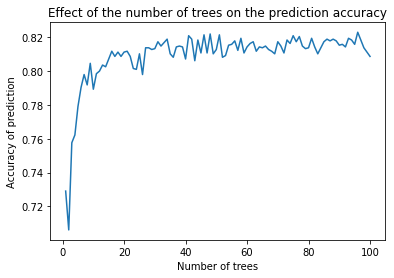

[0.7290816326530613, 0.7061224489795919, 0.7576530612244898, 0.7622448979591837, 0.7790816326530612, 0.7903061224489796, 0.7979591836734694, 0.7918367346938775, 0.8045918367346939, 0.7892857142857143, 0.798469387755102, 0.8, 0.8035714285714286, 0.8025510204081633, 0.8071428571428572, 0.811734693877551, 0.8086734693877551, 0.8112244897959183, 0.8086734693877551, 0.8112244897959183, 0.811734693877551, 0.8086734693877551, 0.801530612244898, 0.8010204081632653, 0.810204081632653, 0.7979591836734694, 0.8137755102040817, 0.8137755102040817, 0.8127551020408164, 0.813265306122449, 0.8173469387755102, 0.814795918367347, 0.8168367346938775, 0.8188775510204082, 0.810204081632653, 0.8081632653061225, 0.8142857142857143, 0.814795918367347, 0.8142857142857143, 0.8071428571428572, 0.8209183673469388, 0.8188775510204082, 0.8061224489795918, 0.8183673469387756, 0.8107142857142857, 0.8214285714285714, 0.8107142857142857, 0.8219387755102041, 0.810204081632653, 0.8127551020408164, 0.8214285714285714, 0.80

In [71]:
def random_forests(wine_set):
    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)

    # split into training and testing sets
    predictors = wine_set[["density", 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 'fixed_acidity',
                           'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']]

    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

    # build model on training data#
    classifier = RandomForestClassifier(n_estimators=25)
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('Confusion matrix:\n', sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:', sklearn.metrics.accuracy_score(tar_test, predictions))

    # to display the relative importance of each predictive variable
    model = ExtraTreesClassifier()
    model.fit(pred_train, tar_train)

    print('\nImportance of predictors:')
    dct = dict()
    for c in range(len(predictors.columns)):
        dct[predictors.columns[c]] = model.feature_importances_[c]
    print(sorted(dct.items(), key=operator.itemgetter(1), reverse=True))

    # run different numbers of trees to see the effect of the number on the accuracy of the prediction
    n = 100
    accuracy = [0]*n

    for i in range(n):
        classifier = RandomForestClassifier(n_estimators=i+1)
        classifier = classifier.fit(pred_train, tar_train)
        predictions = classifier.predict(pred_test)
        accuracy[i] = sklearn.metrics.accuracy_score(tar_test, predictions)

    plt.plot(range(1, n+1), accuracy)
    plt.xlabel("Number of trees")
    plt.ylabel("Accuracy of prediction")
    plt.title("Effect of the number of trees on the prediction accuracy")
    plt.show()

    print(accuracy)

print('----------------Random Forests------------------------')
call(random_forests)

In [ ]:
#LINEAR REGRESSION


Red Wine



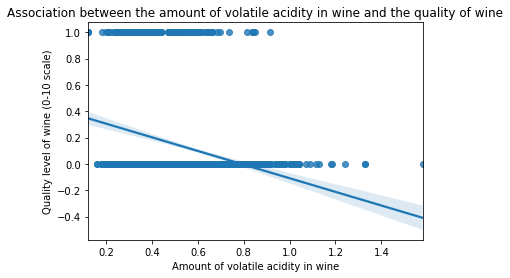

mean of the volatile acidity variable =  0.5278205128205131
mean of the volatile acidity variable after normalization =  -3.210203973955229e-16

OLS regression model for the association between the amount of volatile acidity in wine and the quality of wine:
                            OLS Regression Results                            
Dep. Variable:              quality_c   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     126.3
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           2.96e-28
Time:                        07:27:13   Log-Likelihood:                -494.64
No. Observations:                1599   AIC:                             993.3
Df Residuals:                    1597   BIC:                             1004.
Df Model:                           1                                         
Covariance Type:            non

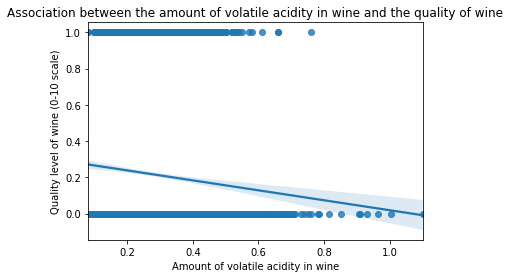

mean of the volatile acidity variable =  0.27824111882401087
mean of the volatile acidity variable after normalization =  -1.0712870180806514e-15

OLS regression model for the association between the amount of volatile acidity in wine and the quality of wine:
                            OLS Regression Results                            
Dep. Variable:              quality_c   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     22.23
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           2.49e-06
Time:                        07:27:13   Log-Likelihood:                -2593.3
No. Observations:                4898   AIC:                             5191.
Df Residuals:                    4896   BIC:                             5204.
Df Model:                           1                                         
Covariance Type:            n

In [72]:
def basic_linear(wine_set):
     # recode quality into 2 groups: 0:{3,4,5,6}, 1:{7,8,9}
    recode = {3: 0, 4: 0, 5:0, 6:0, 7:1, 8:1, 9:1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)
    scat0 = seaborn.regplot(x="volatile_acidity", y="quality_c", fit_reg=True, data=wine_set)
    plt.xlabel("Amount of volatile acidity in wine")
    plt.ylabel("Quality level of wine (0-10 scale)")
    plt.title("Association between the amount of volatile acidity in wine and the quality of wine")
    plt.show()

    # centering the explanatory variable by subrtacting the mean
    f_acidity_mean = wine_set["volatile_acidity"].mean()
    print("mean of the volatile acidity variable = ", f_acidity_mean)
    wine_set["volatile_acidity"] = wine_set["volatile_acidity"] - f_acidity_mean
    print("mean of the volatile acidity variable after normalization = ", wine_set["volatile_acidity"].mean())

    print ("\nOLS regression model for the association between the amount of volatile acidity in wine and the quality of wine:")
    model1 = smf.ols(formula="quality_c ~ volatile_acidity", data=wine_set)
    results1 = model1.fit()
    print(results1.summary())


call(basic_linear)

In [73]:
#LASSO REGRESSION

----------------Lasso Regression------------------------

Red Wine

Predictors and their regression coefficients:
density : -0.020095347815245482
alcohol : 0.2931274859362391
sulphates : 0.13551717868691351
pH : -0.027802563013414616
volatile_acidity : -0.19031297553742008
chlorides : -0.083939172451574
fixed_acidity : 0.0
citric_acid : 0.0
residual_sugar : 0.01752069148896735
free_sulfur_dioxide : 0.0
total_sulfur_dioxide : -0.07928212046868248

Alpha: 0.000247999475189141


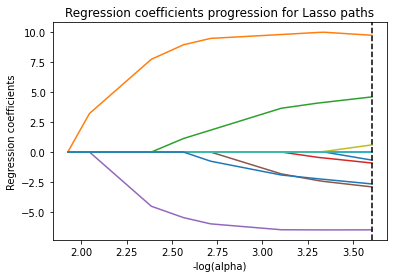

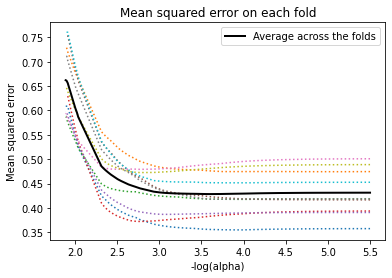


Mean squared error for training data: 0.4203875908920114
Mean squared error for test data: 0.42181400455172563

R-square for training data: 0.36296411276202817
R-square for test data: 0.33280737417126016

White Wine

Predictors and their regression coefficients:
density : -0.24939511143228965
alcohol : 0.3303025577975105
sulphates : 0.06748773072115656
pH : 0.05785746749830347
volatile_acidity : -0.19002207866367585
chlorides : -0.0040670807989420035
fixed_acidity : 0.0
citric_acid : 0.0
residual_sugar : 0.29498128507596155
free_sulfur_dioxide : 0.05520792036549576
total_sulfur_dioxide : -0.01300673532891475

Alpha: 9.211601493057599e-05


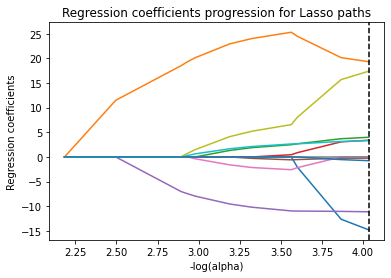

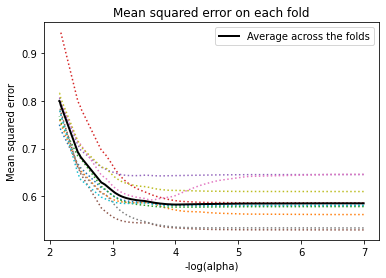


Mean squared error for training data: 0.5763917424436985
Mean squared error for test data: 0.5387294766360478

R-square for training data: 0.2784951594704027
R-square for test data: 0.28165901553327566


In [74]:
def lasso_regr(wine_set):

    pred = wine_set[["density", 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 'fixed_acidity',
                    'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']]
    predictors = pred.copy()
    targets = wine_set.quality

    # standardize predictors to have mean=0 and sd=1
    predictors = pd.DataFrame(preprocessing.scale(predictors))
    predictors.columns = pred.columns
    # print(predictors.head())

    # split into training and testing sets
    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.3, random_state=123)

    # specify the lasso regression model
    model = LassoLarsCV(cv=10, precompute=False).fit(pred_train, tar_train)

    print('Predictors and their regression coefficients:')
    d = dict(zip(predictors.columns, model.coef_))
    for k in d:
        print(k, ':', d[k])

    # plot coefficient progression
    m_log_alphas = -np.log10(model.alphas_)
    # ax = plt.gca()
    plt.plot(m_log_alphas, model.coef_path_.T)
    print('\nAlpha:', model.alpha_)
    plt.axvline(-np.log10(model.alpha_), linestyle="dashed", color='k', label='alpha CV')
    plt.ylabel("Regression coefficients")
    plt.xlabel("-log(alpha)")
    plt.title('Regression coefficients progression for Lasso paths')
    plt.show()

    # plot mean squared error for each fold
    m_log_alphascv = -np.log10(model.cv_alphas_)
    plt.plot(m_log_alphascv, model.mse_path_, ':')
    plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
    plt.legend()
    plt.xlabel('-log(alpha)')
    plt.ylabel('Mean squared error')
    plt.title('Mean squared error on each fold')
    plt.show()

    # Mean squared error from training and test data
    train_error = mean_squared_error(tar_train, model.predict(pred_train))
    test_error = mean_squared_error(tar_test, model.predict(pred_test))
    print('\nMean squared error for training data:', train_error)
    print('Mean squared error for test data:', test_error)

    rsquared_train = model.score(pred_train, tar_train)
    rsquared_test = model.score(pred_test, tar_test)
    print('\nR-square for training data:', rsquared_train)
    print('R-square for test data:', rsquared_test)
#
print('----------------Lasso Regression------------------------')
call(lasso_regr)